## Imports

In [1]:
from jatic_toolbox import load_dataset as load_jatic_dataset
from charmory.utils import PILtoNumpy_HuggingFace
from matplotlib import pyplot as plt

## Load Pokemon Dataset From HuggingFace into Jatic Dataset

In [2]:
train_dataset = load_jatic_dataset(
    provider="huggingface",
    dataset_name="keremberke/pokemon-classification",
    task="image-classification",
    name="full",
    split="train",
)
#Using set transform to convert PIL images to numpy arrays
transform = PILtoNumpy_HuggingFace()
train_dataset.set_transform(transform)

/home/chris/.virtualenvs/cdao/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Found cached dataset pokemon-classification (/home/chris/.cache/huggingface/datasets/keremberke___pokemon-classification/full/1.0.0/5193d0f863ed08164636296506df483caa6c9965bc05198ec2136417398e4b28)
Loading cached processed dataset at /home/chris/.cache/huggingface/datasets/keremberke___pokemon-classification/full/1.0.0/5193d0f863ed08164636296506df483caa6c9965bc05198ec2136417398e4b28/cache-7cc7ed8ebcffdb4d.arrow


## Take out 4 samples

In [3]:
show_examples, show_labels = train_dataset[:]['image'], train_dataset[:]['label']
pokemon_labels_to_show = [1,2,3,4]
first_index_occurrence = [show_labels.index(x) for x in pokemon_labels_to_show]
pokemon_examples = [show_examples[i] for i in first_index_occurrence]

## Displaying Images

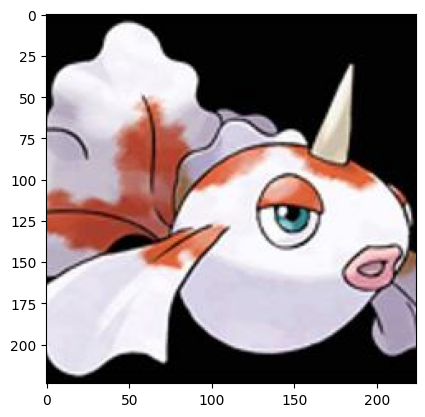

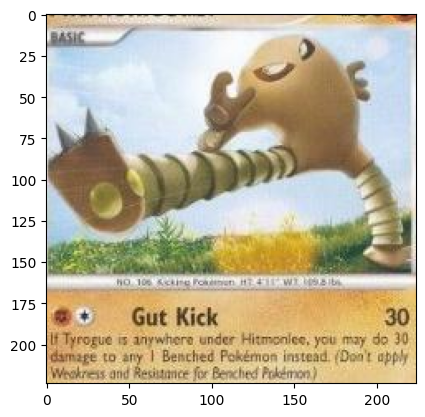

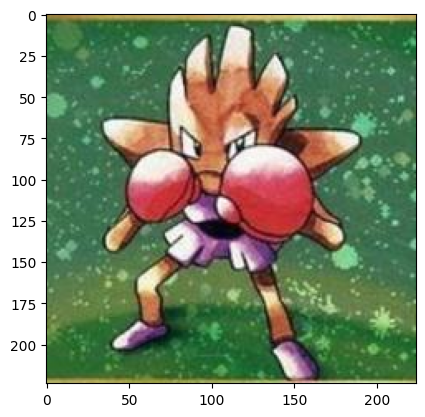

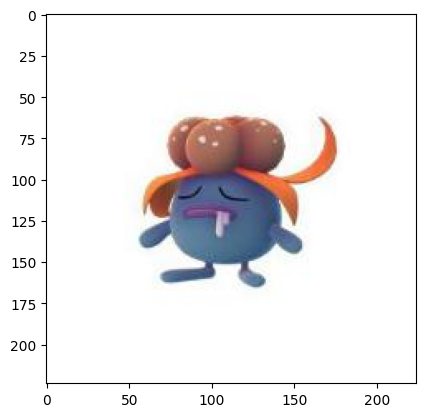

In [4]:
plt.figure()
for pokemon in pokemon_examples:
    plt.imshow(pokemon)
    plt.show(block=True)